In [1]:
from __future__ import print_function
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.utils import np_utils
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
import matplotlib.pyplot as plt

import os

Using TensorFlow backend.


In [2]:
#configure
batch_size = 32
num_classes = 10
epochs = 25
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_Alexnet.h5'

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

In [5]:
# AlexNet Define the Model
model = Sequential()
# model.add(Conv2D(96, (11,11), strides=(4,4), activation='relu', padding='same', input_shape=(img_height, img_width, channel,)))
# for original Alexnet

model.add(Conv2D(96, (3,3), strides=(2,2), activation='relu', padding='same', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


# print the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 96)        2688      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 96)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 3, 256)         1024      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 384)         885120    
__________

In [6]:
# initiate RMSprop optimizer

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train,           
              batch_size=batch_size,
              epochs=epochs,
              #callbacks=callbacks,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 389s 8ms/step - loss: 1.6922 - acc: 0.4330 - val_loss: 1.7371 - val_acc: 0.4562
Epoch 2/25
50000/50000 [==============================] - 390s 8ms/step - loss: 1.2727 - acc: 0.5674 - val_loss: 1.3691 - val_acc: 0.5499
Epoch 3/25
50000/50000 [==============================] - 389s 8ms/step - loss: 1.0627 - acc: 0.6348 - val_loss: 1.0560 - val_acc: 0.6379
Epoch 4/25
50000/50000 [==============================] - 389s 8ms/step - loss: 0.9174 - acc: 0.6836 - val_loss: 1.0103 - val_acc: 0.6487
Epoch 5/25
50000/50000 [==============================] - 389s 8ms/step - loss: 0.8032 - acc: 0.7226 - val_loss: 1.0565 - val_acc: 0.6519
Epoch 6/25
50000/50000 [==============================] - 390s 8ms/step - loss: 0.7062 - acc: 0.7542 - val_loss: 1.4054 - val_acc: 0.5694
Epoch 7/25
50000/50000 [==============================] - 391s 8ms/step - loss: 0.6267 - acc: 0.7858 - val_loss: 0.9001 - 

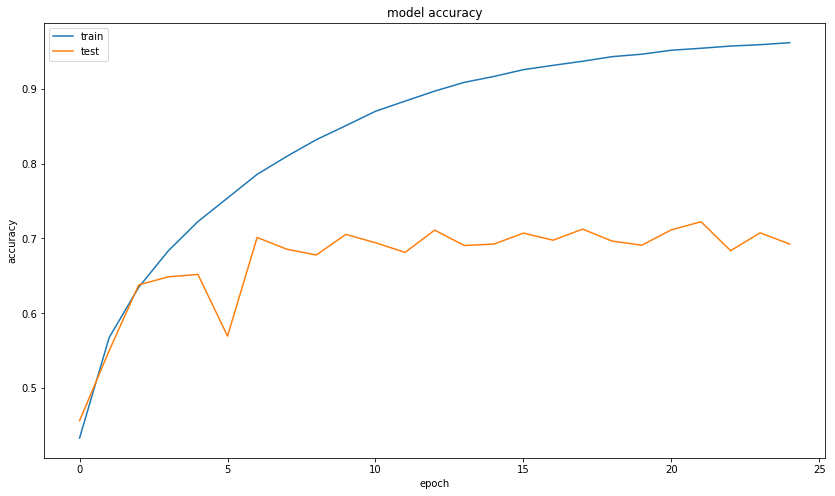

In [10]:
# summarize history for accuracy

plt.figure(figsize=(14,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

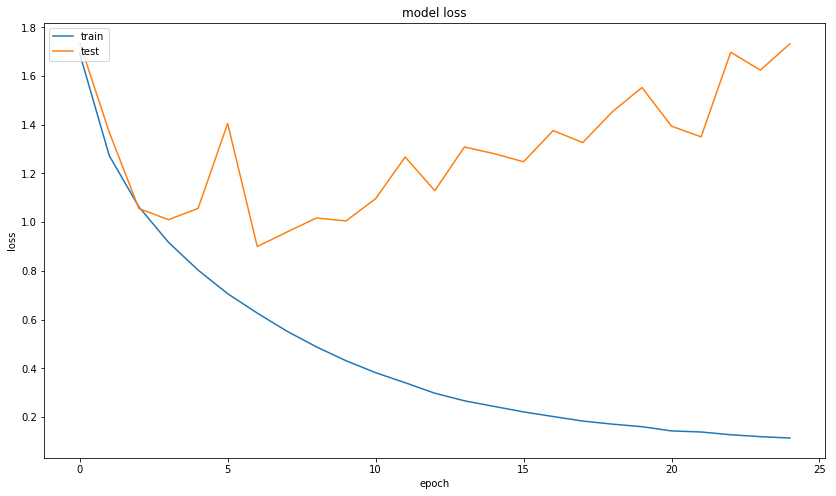

In [11]:
# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
model.save('imagenet_train.h5')